# Exploring the Julia Set in Julia

In [7]:
const maxiter = 100

function julia(z::Number, c::Number)
    for n = 1:maxiter
        abs2(z) > 4 && return n-1
        z = z^2 + c
    end
    return maxiter
end

julia (generic function with 2 methods)

In [8]:
julia(-0.06 + .50im, -0.03 + .66im)

52

In [9]:
julia(1, 0.5)

2

In [10]:
[julia(r + i*im, -0.06 + .665im) for r=-1:.002:1, i=-0.5:.002:0.5]

1001×501 Array{Int64,2}:
  2   2   2   2   2    2    2    2    2  …   71   37   35  35  34  33  33  33
  2   2   2   2   2    2    2    2    2     100   38   36  35  34  33  33  32
  2   2   2   2   2    2    2    2    2      76  100  100  36  33  33  32  32
  2   2   2   2   2    2    2    2    2      56  100   45  34  33  32  32  32
  2   2   2   2   2    2    2    2    2      61   67   36  34  32  32  32  31
  2   2   2   2   2    2    2    2    2  …   89  100   35  33  32  32  31  31
  2   2   2   2   2    2    2    2    2     100   44   73  34  32  31  31  31
  2   2   2   2   2    2    2    2    2      56   91   54  58  31  31  30  30
  2   2   2   2   2    2    2    2    2      61   42   35  31  30  30  30  30
  2   2   2   2   2    2    2    2    2      67   33   31  30  29  29  29  30
  2   2   2   2   2    2    2    2    2  …   66   35   30  29  29  29  29  29
  2   2   2   2   2    2    2    2    2      64   58   29  28  28  28  29  29
  2   2   2   2   2    2    2    2    2

In [11]:
@code_native julia(-0.02 + .7im, -0.06 + .665im)

	.section	__TEXT,__text,regular,pure_instructions
; Function julia {
; Location: In[1]:4
	vmovupd	(%rdi), %xmm1
; Location: In[1]:5
; Function abs2; {
; Location: complex.jl:261
; Function *; {
; Location: float.jl:397
	vmulpd	%xmm1, %xmm1, %xmm0
;}}
; Function abs2; {
; Location: float.jl:393
	vpermilpd	$1, %xmm0, %xmm2 ## xmm2 = xmm0[1,0]
	vaddsd	%xmm2, %xmm0, %xmm3
	movabsq	$4754782352, %rcx       ## imm = 0x11B683890
;}
; Function >; {
; Location: operators.jl:286
; Function <; {
; Location: float.jl:486
; Function <; {
; Location: float.jl:450
	vucomisd	(%rcx), %xmm3
;}}}
	ja	L113
	vmovsd	(%rsi), %xmm3           ## xmm3 = mem[0],zero
	vmovsd	8(%rsi), %xmm4          ## xmm4 = mem[0],zero
; Location: In[1]:5
	vpermilpd	$1, %xmm1, %xmm5 ## xmm5 = xmm1[1,0]
	xorl	%eax, %eax
	vmovsd	(%rcx), %xmm6           ## xmm6 = mem[0],zero
	nopw	(%rax,%rax)
; Location: In[1]:6
; Function iterate; {
; Location: range.jl:591
; Function ==; {
; Location: promotion.jl:403
L64:
	cmpq	$99, %rax
;}}
	je	

In [12]:
@code_native julia(1, 2)

	.section	__TEXT,__text,regular,pure_instructions
; Function julia {
; Location: In[7]:5
; Function abs2; {
; Location: number.jl:157
; Function *; {
; Location: In[7]:4
	imulq	%rdi, %rdi
	xorl	%eax, %eax
;}}
; Function >; {
; Location: operators.jl:286
; Function <; {
; Location: int.jl:49
	cmpq	$4, %rdi
;}}
	jg	L39
	nopl	(%rax)
; Location: In[7]:6
; Function iterate; {
; Location: range.jl:591
; Function ==; {
; Location: promotion.jl:403
L16:
	cmpq	$99, %rax
;}}
	je	L40
; Function +; {
; Location: int.jl:53
	addq	%rsi, %rdi
;}
; Location: In[7]:5
; Function abs2; {
; Location: number.jl:157
; Function *; {
; Location: int.jl:54
	imulq	%rdi, %rdi
;}}
	addq	$1, %rax
; Function >; {
; Location: operators.jl:286
; Function <; {
; Location: int.jl:49
	cmpq	$5, %rdi
;}}
	jl	L16
L39:
	retq
L40:
	movl	$100, %eax
; Location: In[7]:5
	retq
	nop
;}


In [13]:
using Colors, Images

In [14]:
const cmap = colormap("RdBu", 100)

In [16]:
typeof(cmap)

Array{RGB{Float64},1}

In [ ]:
# const cmap = convert(Vector{RGB{N0f8}}, colormap("RdBu", 100))

In [17]:
px = cmap[75]

In [18]:
dump(px)

RGB{Float64}
  r: Float64 0.4627709711649191
  g: Float64 0.7061052756866557
  b: Float64 0.9079059726873007


In [19]:
px.r

0.4627709711649191

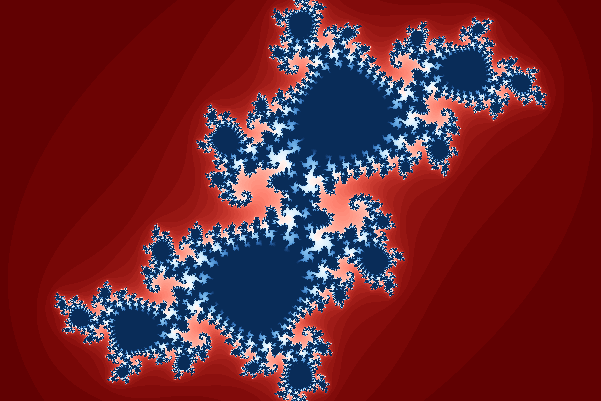

In [23]:
[cmap[julia(r + i*im, -0.051 + .65im)] for i=-1:.005:1, r=-1.5:.005:1.5]

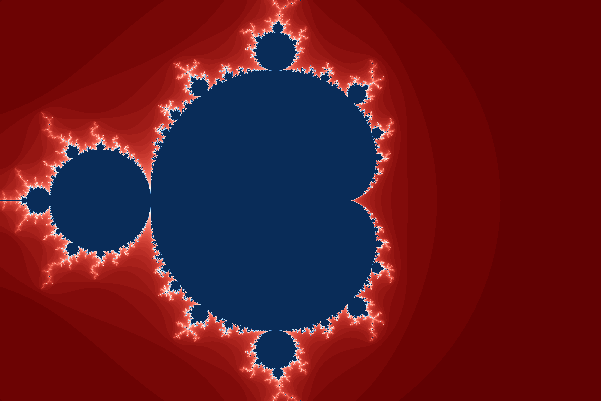

In [24]:
[cmap[julia(r + i*im, r + i*im)] for i=-1:.005:1, r=-1.5:.005:1.5]

In [25]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/26d81b3f84be5e55115749ad4db58fe3ef166c26-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/26d81b3f84be5e55115749ad4db58fe3ef166c26-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:r′=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_05", 0, Any[SyncCallback(Scope("knockout-component-cac9a976-8bd3-4842-afea-4e841db3b2a1", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["r′"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_03", ["-0.1", "-0.09", "-0.08", "-0.07", "-0.06", "-0.05", "-0.04", "-0.03", "-0.02", "-0.01"  …  "0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09", "0.1"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_04", "0.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_02", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-0.1:0.01:0.1)), Observable{Float64}("ob_01", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-0.1:0.01:0.1)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##15#18,Observable{Any}},Tuple{Observable{Float64},Observable{Float64}}}(##16#17{##15#18,Observable{Any}}(##15#18(), Observable{Any}("ob_11", RGB{Float64}[RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); … ; RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272)], Any[])), (Observable{Float64}(#= circular reference @-4 =#), Observable{Float64}("ob_06", 0.75, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.65:0.01:0.85)), Observable{Any}("ob_07", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.65:0.01:0.85)), Observable{Float64}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-5 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope
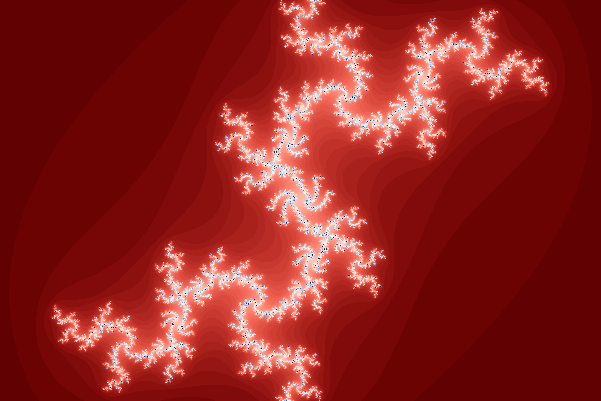
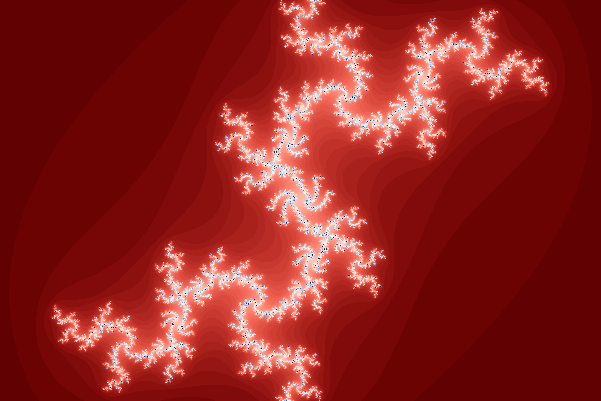

In [26]:
@manipulate for r′ = -0.1:0.01:0.1, i′ = 0.65:0.01:0.85
    [cmap[julia(r + i*im, r′ + i′*im)] for i=-1:.005:1, r=-1.5:.005:1.5]
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i′=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_18", 0, Any[SyncCallback(Scope("knockout-component-d16a2e04-3b7d-4c53-9078-f8f21b6f3b79", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i′"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_16", ["0.65", "0.66", "0.67", "0.68", "0.69", "0.7", "0.71", "0.72", "0.73", "0.74"  …  "0.76", "0.77", "0.78", "0.79", "0.8", "0.81", "0.82", "0.83", "0.84", "0.85"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_17", "0.75", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_15", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.65:0.01:0.85)), Observable{Float64}("ob_14", 0.75, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.65:0.01:0.85)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##21#23{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Float64},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}},Tuple{Observable{Float64},Observable{Float64}}}(##16#17{##21#23{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Float64},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}}(##21#23{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Float64},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}}(-1.0:0.005:1.0, RGB{Float64}[RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); … ; RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272)], -1.5:0.005:1.5), Observable{Any}("ob_24", RGB{Float64}[RGB{Float64}(0.37863,
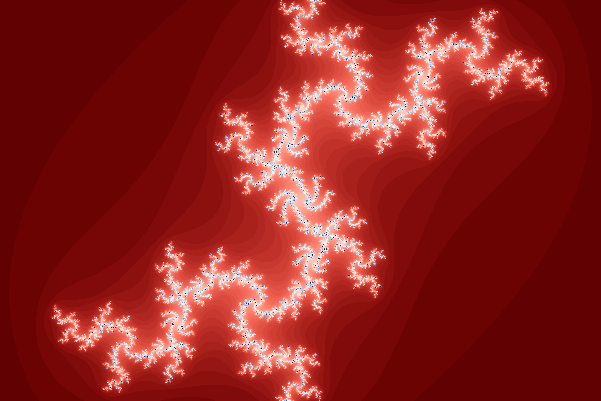
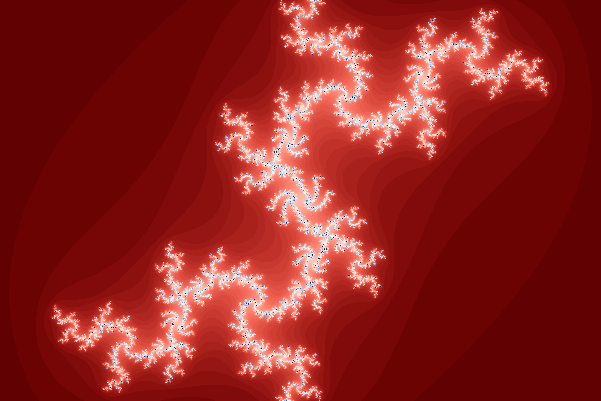

In [27]:
let I = -1:.005:1, R = -1.5:.005:1.5
    img = Array{eltype(cmap)}(undef, length(I), length(R))
    @manipulate for i′ = 0.65:0.01:0.85, r′ = -0.1:0.01:0.1
        for (j, i) in enumerate(I),
            (k, r) in enumerate(R)
            img[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
        end
        img
    end
end

In [28]:
using Base.Threads

nthreads()

4

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i′=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_31", 0, Any[SyncCallback(Scope("knockout-component-0b5becbe-055f-4193-b203-c84f26b75d77", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i′"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>21,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_29", ["0.65", "0.66", "0.67", "0.68", "0.69", "0.7", "0.71", "0.72", "0.73", "0.74"  …  "0.76", "0.77", "0.78", "0.79", "0.8", "0.81", "0.82", "0.83", "0.84", "0.85"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_30", "0.75", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_28", 11, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.65:0.01:0.85)), Observable{Float64}("ob_27", 0.75, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.65:0.01:0.85)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##25#27{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Float64},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}},Tuple{Observable{Float64},Observable{Float64}}}(##16#17{##25#27{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Float64},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}},Observable{Any}}(##25#27{StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}},Array{RGB{Float64},2},StepRangeLen{Float64,TwicePrecision{Float64},TwicePrecision{Float64}}}(-1.0:0.005:1.0, RGB{Float64}[RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); … ; RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272); RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272) … RGB{Float64}(0.37863,0.00561671,0.00638272) RGB{Float64}(0.37863,0.00561671,0.00638272)], -1.5:0.005:1.5), Observable{Any}("ob_37", RGB{Float64}[RGB{Float64}(0.37863,
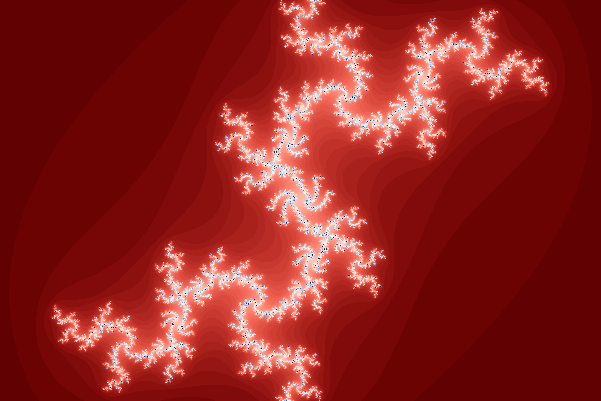
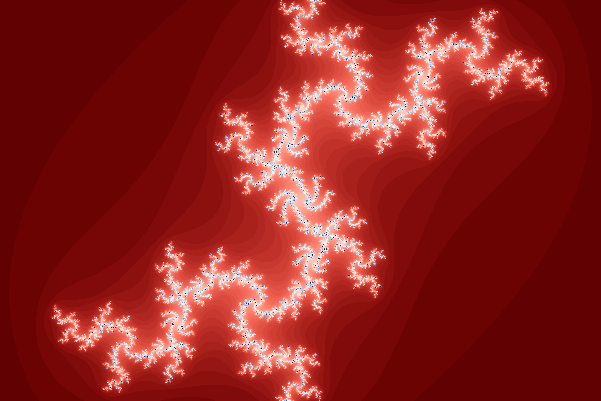

In [29]:
let I = -1:.005:1, R = -1.5:.005:1.5
    img = Array{eltype(cmap)}(undef, length(I), length(R))
    @manipulate for i′ = 0.65:0.01:0.85, r′ = -0.1:0.01:0.1
        @threads for j = 1:length(I)
            i = I[j]
            for k = 1:length(R)
                r = R[k]
                img[j,k] = cmap[julia(r + i*im, r′ + i′*im)]
            end
        end
        img
    end
end